<a href="https://colab.research.google.com/github/leobioinf0/SkLearn_Train_Test/blob/main/S11_T01_SkLearn_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: 
  - Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

## Upgrade modules

In [1]:
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade pandas
!pip install --upgrade scikit-learn

## Load modules and define functions

In [2]:
# Data treatment
import pandas as pd
from pandas.api.types import infer_dtype
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_bool_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_datetime64_dtype
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Warnings configuration

import warnings
warnings.filterwarnings('ignore')

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%matplotlib inline
sns.set(rc={'figure.figsize':(20,5)})
from tqdm import tqdm_notebook
import os

In [3]:
def custom_plots(dat, color, title, ax=None, cW=None):
    '''
    Generate proportion histogram and tescriptive table of variable 
    taking into account the type of data
    ''' 
    if ax is None:
        ax = plt.gca()
    if is_categorical_dtype(dat):
        desc_table = dat.describe().to_frame().T
        if dat.nunique() > 31:
            top20 = dat.value_counts().head(20)/len(dat)
            ax.barh(y=top20.index,
                    width=top20,
                    color=color)
            title = title + ' ' +"Top-20"
        else:
            sns.histplot(y=dat, stat="proportion", color=color, 
                 kde=True, ax=ax, bins=len(dat.unique()))
    
    elif infer_dtype(dat) == "time":
        desc_table = dat.describe().to_frame().T
        prop = dat.value_counts()/len(dat)
        prop.plot(ax=ax)

    elif is_bool_dtype(dat):
        desc_table = dat.describe().to_frame().T
        ax.pie(dat.value_counts(),
               labels = dat.unique(),
               startangle=45,
               autopct=lambda p: '{:.3f}%({:.0f})'.format(p,(p/100)*len(dat)))

    elif is_datetime64_dtype(dat):
        desc_table = dat.describe().to_frame().T
        sns.histplot(x=dat, stat="proportion", color=color,
                     kde=True, ax=ax)
    elif infer_dtype(dat) == "O":
        desc_table = dat.describe().to_frame().T
        sns.histplot(x=dat, stat="proportion", color=color,
                     kde=True, ax=ax, bins=len(dat.unique()))
    else:
        desc_table = round(dat.describe(),2).to_frame().T
        sns.histplot(x=dat, stat="proportion", color=color,
                     kde=True, ax=ax, bins=len(dat.unique()))
    
    the_table = ax.table(cellText=desc_table.values,
            colLabels=desc_table.columns,
            loc='top',
            colWidths=cW)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)

    ax.set_title(title + ' ' + dat.name,
                 fontsize = 14,
                 fontweight = "bold",
                 loc='center',
                 pad=31)
    ax.set_xlabel("")
    return(ax)


def numToTime(x):
    """
    Convert aeronautical time to datetime.time object
    """
    from datetime import time
    if pd.isnull(x):
        return np.nan
    else:
        x = str(int(x))
        h = x[:-2]
        if h == "" or h == "24":
            h = "0"
        m = x[-2:]
        return time(int(h), int(m))

## Load Data

In [4]:
# Path folder configuration
path="./"
filepath = "https://raw.githubusercontent.com/leobioinf0/SkLearn_Train_Test/main/DelayedFlightsSmall.csv"
df = pd.read_csv(filepath, index_col=0)

## Preprocessing

### Categorical data

Define Categorical Attributes

In [5]:
# category: Finite list of values
df['TailNum'] = pd.Categorical(df['TailNum'], [str(i) for i in df['TailNum'].unique()].sort())
df['CancellationCode']= df['CancellationCode'].replace({"A" : "carrier", "B" : "weather", "C" : "NAS", "D" : "security", "N" : "none" })
df['FlightNum'] = df['FlightNum'].astype(str)
df['FlightNum']  = pd.Categorical(df['FlightNum'], np.sort(df['FlightNum'].unique()))
for col in tqdm_notebook(['Year', "Month", 'DayOfWeek', 'DayofMonth', 'UniqueCarrier', 'Origin', 'Dest',"CancellationCode"]):
    df[col] = pd.Categorical(df[col], np.sort(df[col].unique()))

  0%|          | 0/8 [00:00<?, ?it/s]

### Boolean data

Define Boolean Attributes

In [6]:
# bool: True/False values
df["Diverted"]=df["Diverted"].astype('bool')
df["Cancelled"]=df["Cancelled"].astype('bool')

### Integer numbers

Since all numerical values do not contain decimals, we convert them to integer values

In [7]:
#int64: Integer numbers
for col in tqdm_notebook(df.select_dtypes(include=['float64']).columns):
    df[col] = df[col].astype('Int64')

  0%|          | 0/14 [00:00<?, ?it/s]

## Split train and test

We divide the data from "df" into "X_train", "X_test" randomly,  in an 80/20 ratio



In [8]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state = 130)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

## Checking if the training set was correcly splitted

In [9]:
# percentage that "X_train" corresponds to the total data
print(round((len(X_train)/len(df)),2))

0.8


In [10]:
# percentage that "X_train" corresponds to the total data
print(round((len(X_test)/len(df)),2))

0.2


## Proportion of null 

We verify that the proportion of null values of each variable is similar in the three datasets.

In [11]:
na_pct=[]
for data in [df, X_train, X_test]:
    pct = data[data.columns[data.isnull().any()]].isnull().sum()/len(data)*100
    na_pct.append(pct)
na_pct_df = pd.DataFrame(na_pct, index=["df_NApct", "X_train_NApct", "X_test_NApct"]).T
na_pct_df

df_NApct  X_train_NApct  X_test_NApct
ArrTime             0.367329       0.371877      0.349135
ActualElapsedTime   0.432730       0.433959      0.427813
CRSElapsedTime      0.009343       0.009220      0.009835
AirTime             0.432730       0.433959      0.427813
ArrDelay            0.432730       0.433959      0.427813
TaxiIn              0.367329       0.371877      0.349135
TaxiOut             0.021145       0.021514      0.019670
CarrierDelay       35.605822      35.535504     35.887097
WeatherDelay       35.605822      35.535504     35.887097
NASDelay           35.605822      35.535504     35.887097
SecurityDelay      35.605822      35.535504     35.887097
LateAircraftDelay  35.605822      35.535504     35.887097

## Study of categorical variables

- For each dataset we draw a barplot per attribute that shows the proportion of each category.
- For attributes with more than 31 categories, we only plot the 20 most frequent categories.
- We also include a table with descriptive statistics.
- In this way we can easily see that the three datasets come from the same distribution.

In [12]:
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols = cat_cols.drop(labels='Year')
cat_cols

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'Origin', 'Dest', 'CancellationCode'],
      dtype='object')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

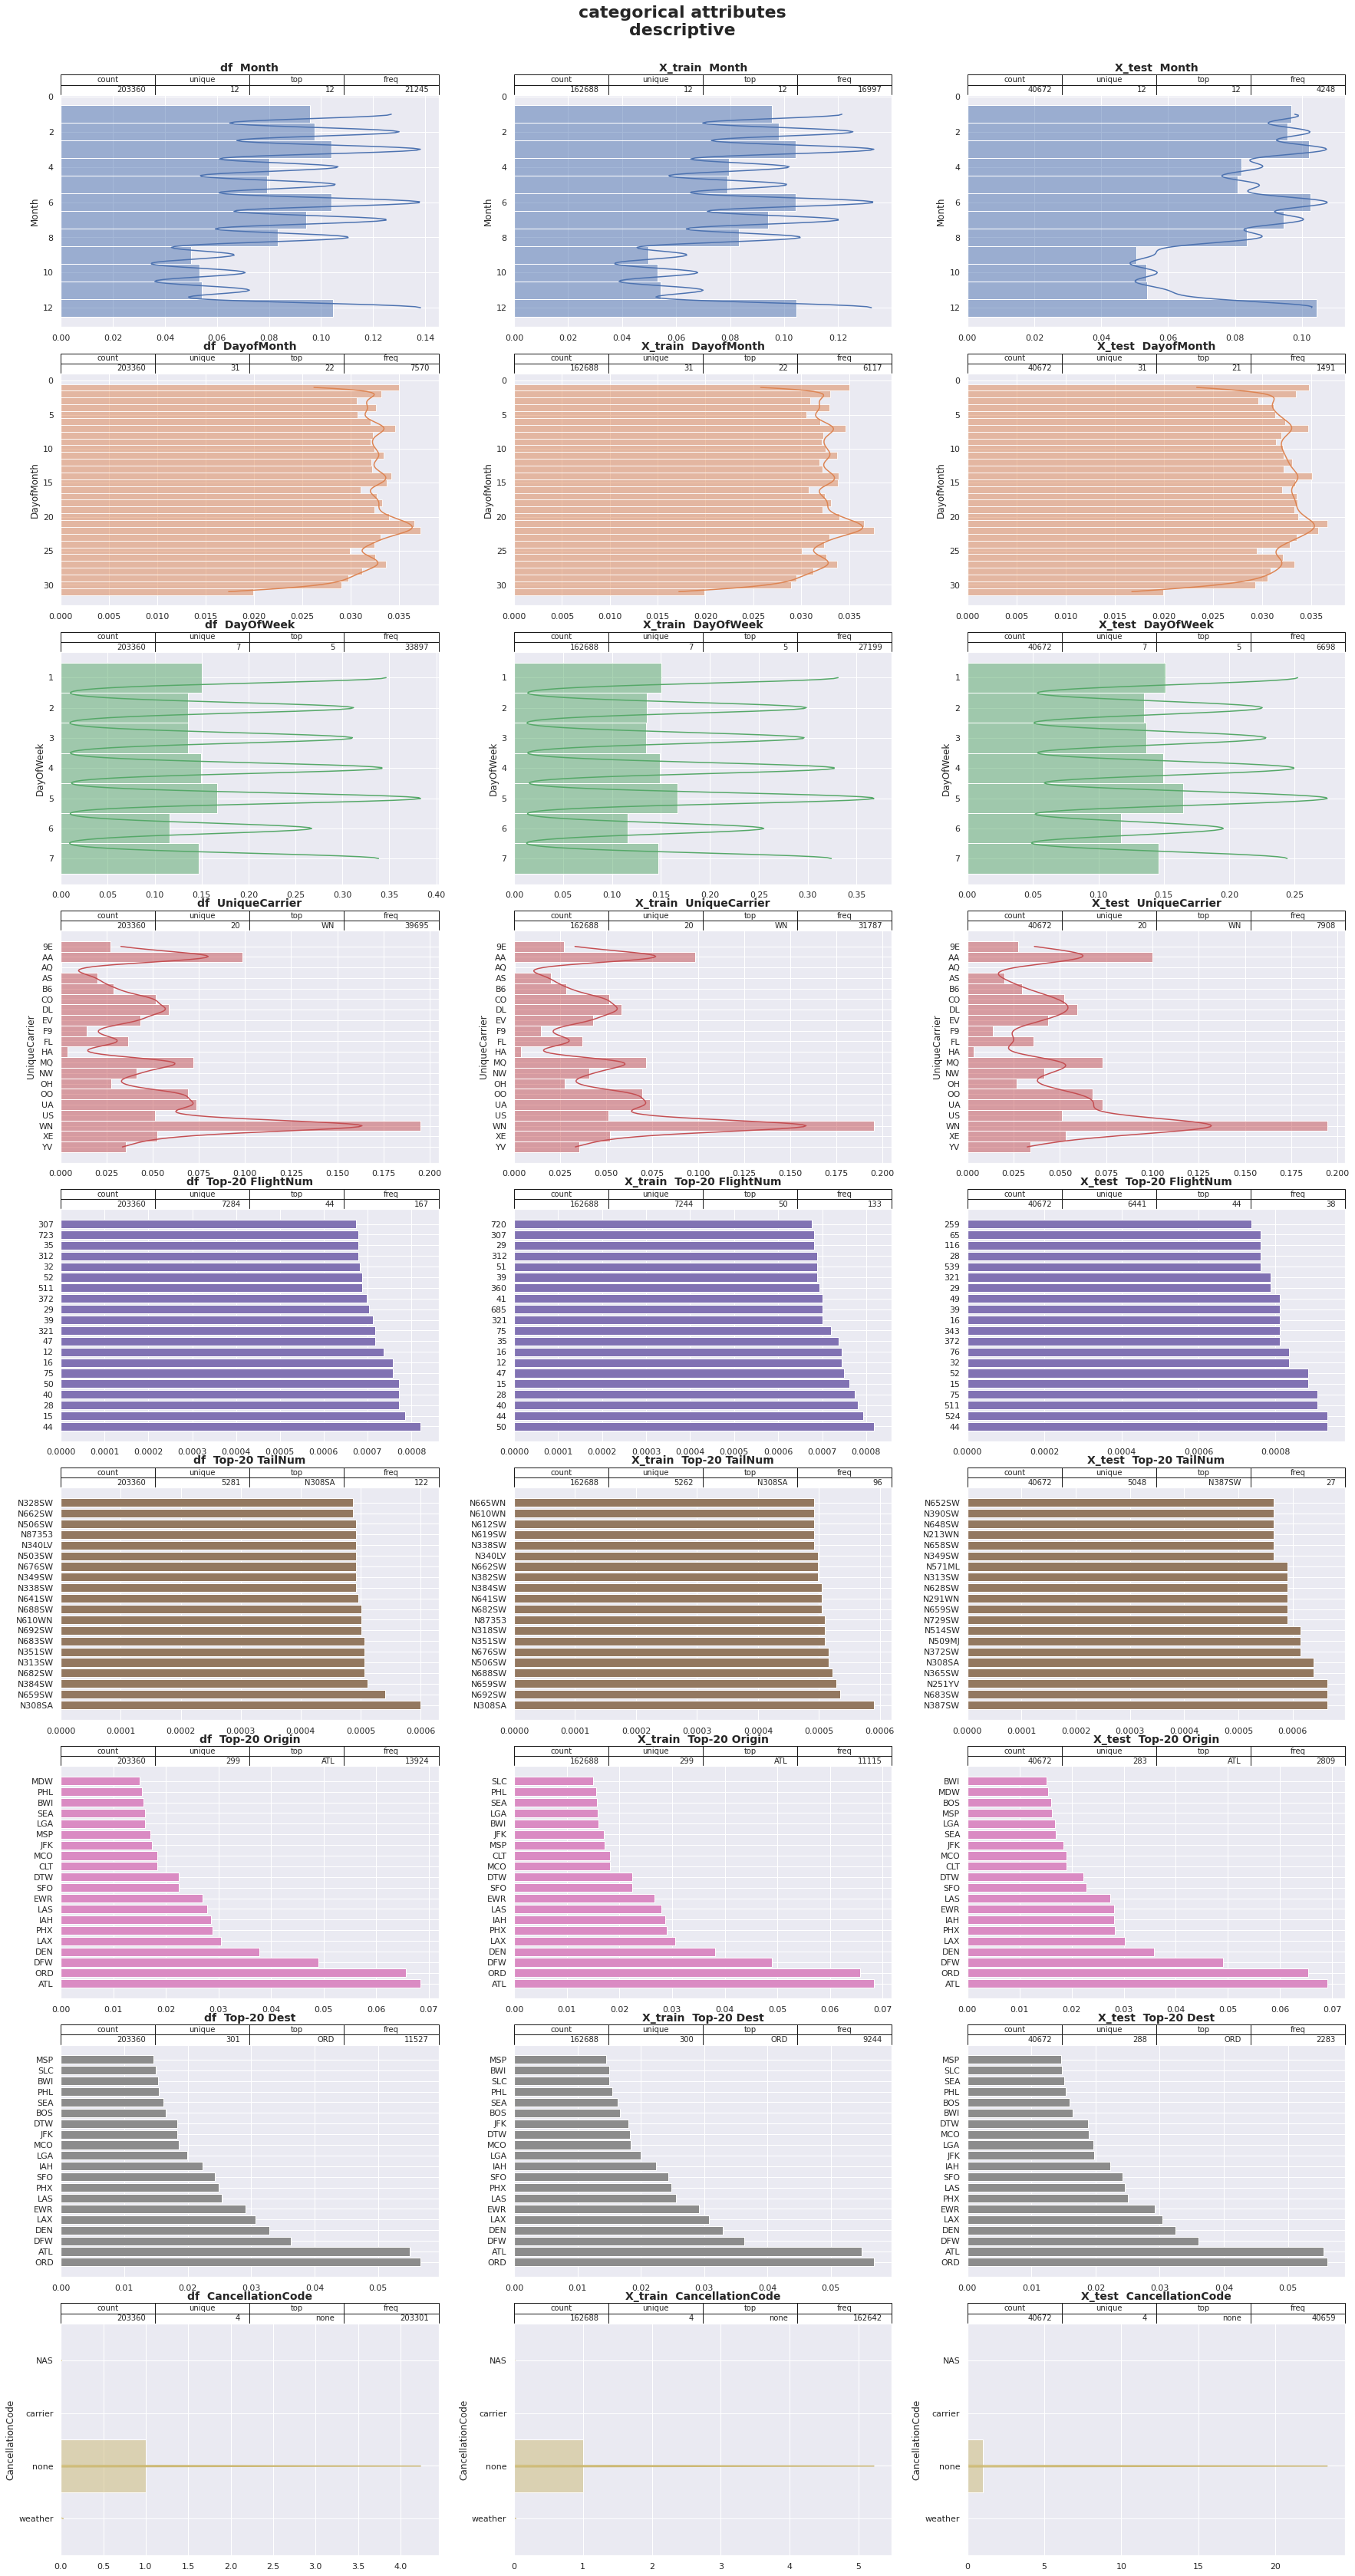

In [13]:
fig, axes = plt.subplots(nrows=len(cat_cols), 
                         ncols=len([df, X_train, X_test]), 
                         figsize=(len([df, X_train, X_test])*10, 
                                  len(cat_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(cat_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])
plt.subplots_adjust(top=0.95)

fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")

plt.savefig(path + infer_dtype(datos)+"_attributes_descriptive.png")
plt.show()

## Study of numerical variables

- For each dataset we draw de ditribution  a d kde of each attribute.
- We also include a table with descriptive statistics.
- In this way we can easily see that the three datasets come from the same distribution.

In [14]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

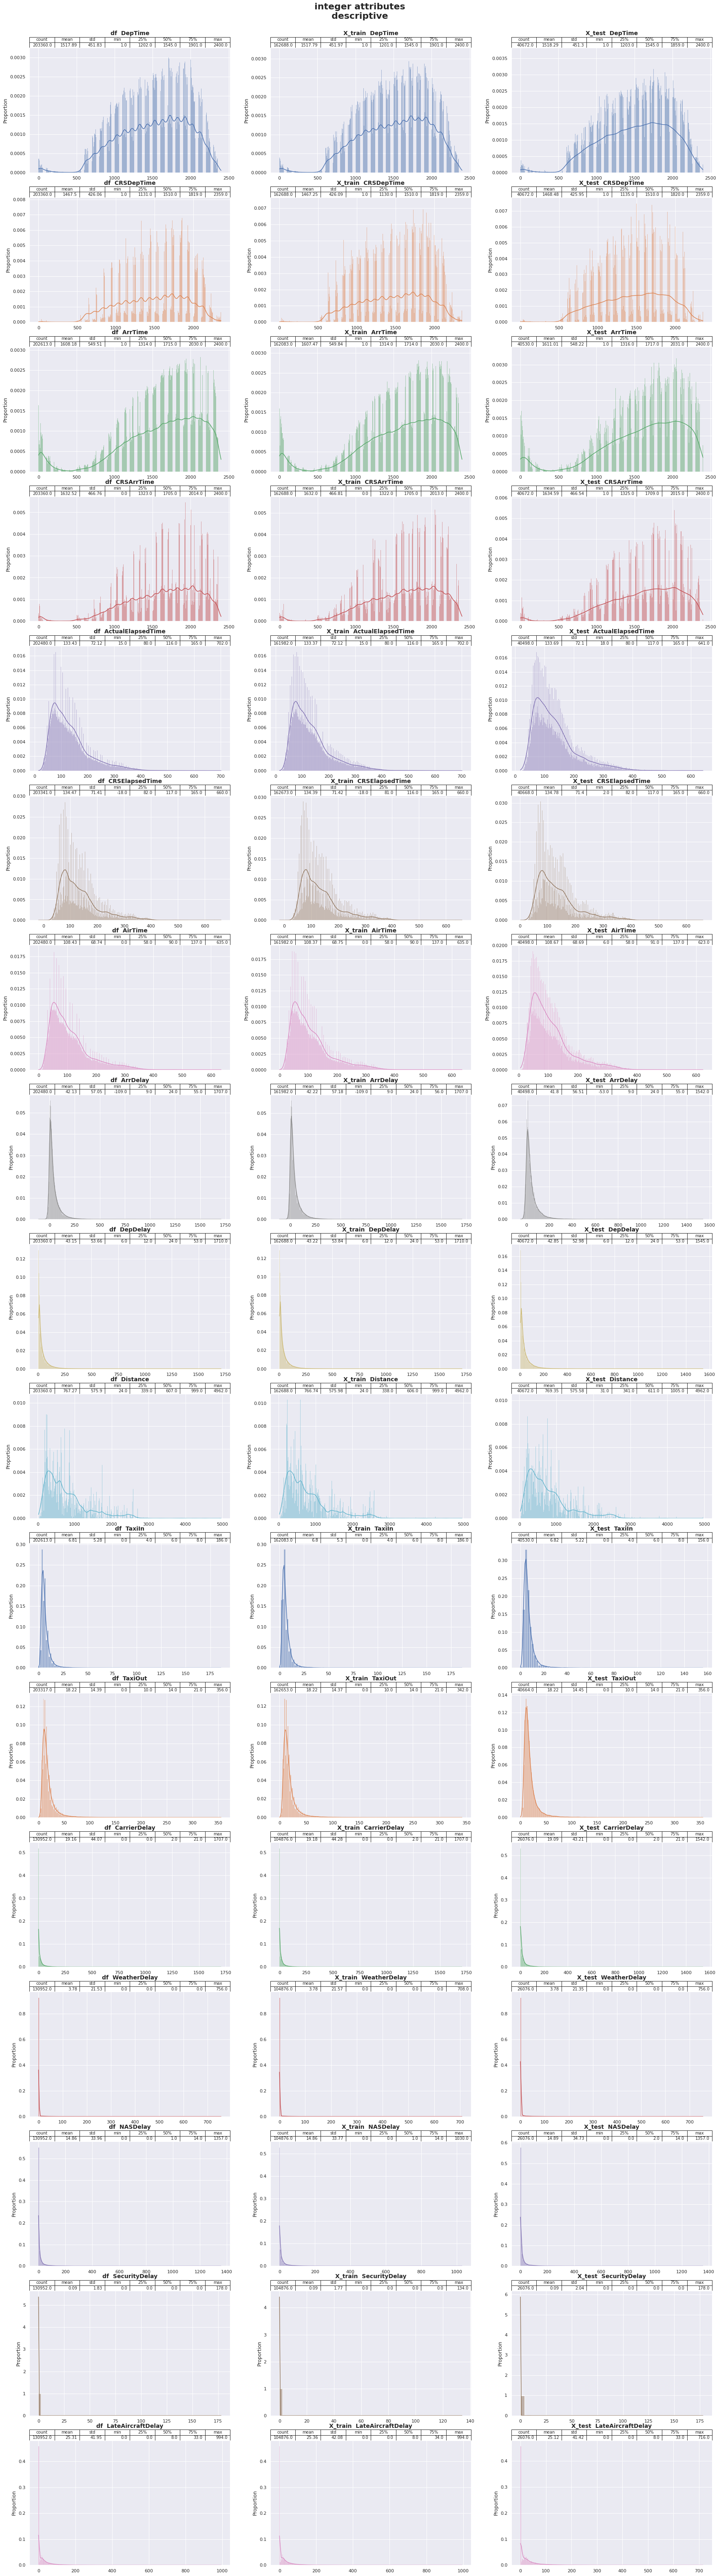

In [15]:
fig, axes = plt.subplots(nrows=len(num_cols), 
                         ncols=len([df, X_train, X_test]), 
                         figsize=(len([df, X_train, X_test])*10, 
                                  len(num_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):
    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    for i, colum in enumerate(tqdm_notebook(num_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])
plt.subplots_adjust(top=0.965)
fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")
plt.savefig(path + infer_dtype(datos)+"_attributes_descriptive.png")
plt.show()

## Study of Boolean variables

- For each dataset we draw piechar of each attribute.
- We also include a table with descriptive statistics.
- In this way we can easily see that the three datasets come from the same distribution.

In [16]:
bool_cols = df.select_dtypes(include=['bool']).columns
bool_cols

Index(['Cancelled', 'Diverted'], dtype='object')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

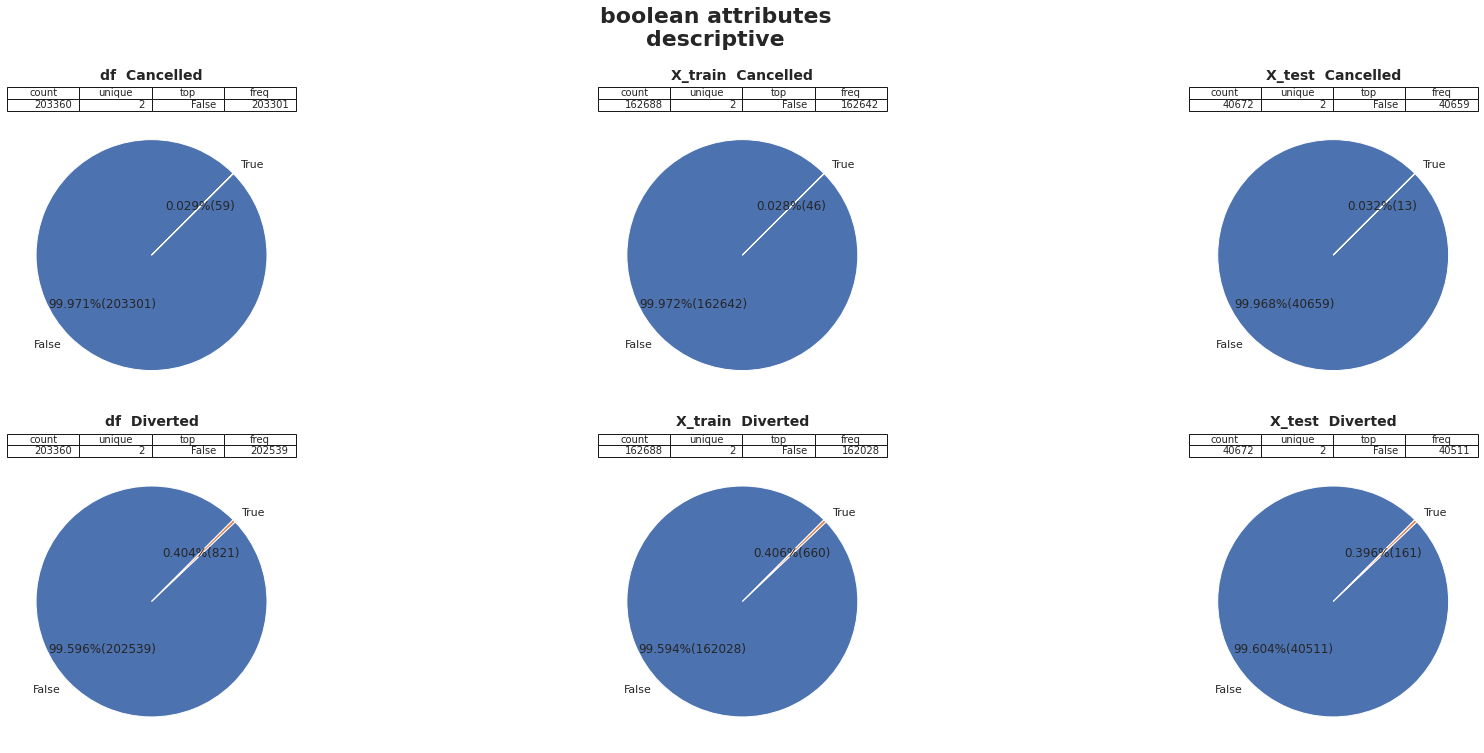

In [17]:
fig, axes = plt.subplots(nrows=len(bool_cols), 
                         ncols=len([df, X_train, X_test]), 
                         figsize=(len([df, X_train, X_test])*10, 
                                  len(bool_cols)*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(bool_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])
plt.subplots_adjust(top=0.86)

fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")

plt.savefig(path + infer_dtype(datos)+"_attributes_descriptive.png")
plt.show()

# Exercise 2: 
  - Apply some transformation process (standardize numerical data, create dummy columns, polynomials.

## Impute missing values

- In the datasets we have categorical and numeric attributes that present null values.
- With Sklearn's SimpleImputer() function we will impute these values using a strategy adapted to each type of data.
- For categorical values we will impute the most frequent value, and for numerical values we will use the "mean"

In [18]:
print("Apply 'SimpleImputer' Transformer for missing value imputation")
for data in tqdm_notebook([df, X_train, X_test]):
    dataset_str= "X_train" if data is X_train else "X_test"
    print("Dataset:"+' '+ dataset_str)
    for col in tqdm_notebook(na_pct_df.index):
        if is_numeric_dtype(data[col]):
            print("\tIn "+col+ " applying strategy='mean'")
            data[[col]] = SimpleImputer(strategy="mean").fit_transform(data[[col]])
        elif is_categorical_dtype(data[col]):
            print("\tIn "+col+ " applying strategy='most_frequent'")
            data[[col]] = SimpleImputer(strategy="most_frequent").fit_transform(data[[col]])
            data[col] = pd.Categorical(data[col], np.sort(data[col].unique()))

Apply 'SimpleImputer' Transformer for missing value imputation


  0%|          | 0/3 [00:00<?, ?it/s]

Dataset: X_test


  0%|          | 0/12 [00:00<?, ?it/s]

	In ArrTime applying strategy='mean'
	In ActualElapsedTime applying strategy='mean'
	In CRSElapsedTime applying strategy='mean'
	In AirTime applying strategy='mean'
	In ArrDelay applying strategy='mean'
	In TaxiIn applying strategy='mean'
	In TaxiOut applying strategy='mean'
	In CarrierDelay applying strategy='mean'
	In WeatherDelay applying strategy='mean'
	In NASDelay applying strategy='mean'
	In SecurityDelay applying strategy='mean'
	In LateAircraftDelay applying strategy='mean'
Dataset: X_train


  0%|          | 0/12 [00:00<?, ?it/s]

	In ArrTime applying strategy='mean'
	In ActualElapsedTime applying strategy='mean'
	In CRSElapsedTime applying strategy='mean'
	In AirTime applying strategy='mean'
	In ArrDelay applying strategy='mean'
	In TaxiIn applying strategy='mean'
	In TaxiOut applying strategy='mean'
	In CarrierDelay applying strategy='mean'
	In WeatherDelay applying strategy='mean'
	In NASDelay applying strategy='mean'
	In SecurityDelay applying strategy='mean'
	In LateAircraftDelay applying strategy='mean'
Dataset: X_test


  0%|          | 0/12 [00:00<?, ?it/s]

	In ArrTime applying strategy='mean'
	In ActualElapsedTime applying strategy='mean'
	In CRSElapsedTime applying strategy='mean'
	In AirTime applying strategy='mean'
	In ArrDelay applying strategy='mean'
	In TaxiIn applying strategy='mean'
	In TaxiOut applying strategy='mean'
	In CarrierDelay applying strategy='mean'
	In WeatherDelay applying strategy='mean'
	In NASDelay applying strategy='mean'
	In SecurityDelay applying strategy='mean'
	In LateAircraftDelay applying strategy='mean'


## Create column "Date_"

- We will create a new column "_Date" from the values "Year", "Month" and "Day of Month". 
- This new column is from dtype `datetime64[ns]`


In [19]:
print("Create Create 'Date' from 'Year', 'Month' and 'Day of Month'")
for data in tqdm_notebook([df, X_train, X_test]):
    dataset_str= "X_train" if data is X_train else "X_test"
    print("Create column 'Date_' in "+ dataset_str)
    data["Date_"]=pd.to_datetime(dict(year=data.Year, month=data.Month, day=data.DayofMonth))

Create Create 'Date' from 'Year', 'Month' and 'Day of Month'


  0%|          | 0/3 [00:00<?, ?it/s]

Create column 'Date_' in X_test
Create column 'Date_' in X_train
Create column 'Date_' in X_test


## datetime.time

- The values of the columns "DepTime", "CRSDepTime", "ArrTime" and "CRSArrTime", although they are integers, represent hours and minutes.
- We will create four new columns transforming these integers in time with HH:MM:SS format. The dtype will be  `datetime.time`
- In the same process we will create four new columns combining the date information and the time information to obtain "datetime". The dtype will be  `datetime`

In [20]:
time_cols=["DepTime","CRSDepTime","ArrTime","CRSArrTime"]
print("Transform time data from 'Int64' into time format")

for data in tqdm_notebook([df, X_train, X_test]):
    dataset_str= "X_train" if data is X_train else "X_test"
    print("Dataset:"+' '+ dataset_str)
    for col in tqdm_notebook(time_cols):
        print("\tTransform "+col+ " into time (HH:MM:SS)")
        data[col+"_time"] = data[col].apply(numToTime)
        print("\tTransform "+col+ " into datetime (YY-MM-DD HH:MM:SS)")
        data[col+"_datetime"] = pd.to_datetime(dict(year=data.Year,
                                                       month=data.Month,
                                                       day=data.DayofMonth,
                                                       hour=[t.hour for t in data[col+"_time"]],
                                                       minute=[t.minute for t in data[col+"_time"]]),
                                                  format='%Y-%m-%d %H:%M:%S')

Transform time data from 'Int64' into time format


  0%|          | 0/3 [00:00<?, ?it/s]

Dataset: X_test


  0%|          | 0/4 [00:00<?, ?it/s]

	Transform DepTime into time (HH:MM:SS)
	Transform DepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSDepTime into time (HH:MM:SS)
	Transform CRSDepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform ArrTime into time (HH:MM:SS)
	Transform ArrTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSArrTime into time (HH:MM:SS)
	Transform CRSArrTime into datetime (YY-MM-DD HH:MM:SS)
Dataset: X_train


  0%|          | 0/4 [00:00<?, ?it/s]

	Transform DepTime into time (HH:MM:SS)
	Transform DepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSDepTime into time (HH:MM:SS)
	Transform CRSDepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform ArrTime into time (HH:MM:SS)
	Transform ArrTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSArrTime into time (HH:MM:SS)
	Transform CRSArrTime into datetime (YY-MM-DD HH:MM:SS)
Dataset: X_test


  0%|          | 0/4 [00:00<?, ?it/s]

	Transform DepTime into time (HH:MM:SS)
	Transform DepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSDepTime into time (HH:MM:SS)
	Transform CRSDepTime into datetime (YY-MM-DD HH:MM:SS)
	Transform ArrTime into time (HH:MM:SS)
	Transform ArrTime into datetime (YY-MM-DD HH:MM:SS)
	Transform CRSArrTime into time (HH:MM:SS)
	Transform CRSArrTime into datetime (YY-MM-DD HH:MM:SS)


## Transformer in numeric columns 

- The numeric columns represent number of minutes.
- We will apply 6 different sklearn transformers to observe their effect on the data.
- We will use the make_column_transformer() function that allows us to apply given transformers on the indicated columns.

In [21]:
minutes_cols = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 
                'DepDelay','TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
                'NASDelay','SecurityDelay', 'LateAircraftDelay']

In [22]:
ct = make_column_transformer(
    (MinMaxScaler(), minutes_cols),
    (MaxAbsScaler(), minutes_cols),
    (StandardScaler(), minutes_cols),
    (RobustScaler(), minutes_cols),
    (PowerTransformer(), minutes_cols),
    (QuantileTransformer(), minutes_cols))

In [23]:
X_train_transformed = ct.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(data=X_train_transformed,
                                      columns=[j+"_"+i for i in list(ct.named_transformers_)[:-1] for j in minutes_cols])
X_train = pd.concat([X_train, X_train_transformed_df], axis=1)

In [29]:
X_train_transformed_df.head()

ActualElapsedTime_minmaxscaler  ...  LateAircraftDelay_quantiletransformer
0                        0.225619  ...                               0.622122
1                        0.080058  ...                               0.000000
2                        0.461426  ...                               0.622122
3                        0.406114  ...                               0.823824
4                        0.045124  ...                               0.622122

[5 rows x 72 columns]

## Transformer in categorical columns 

We Encode the categorical feature  "UniqueCarrier" as a one-hot numeric array.


In [30]:
ohe_UniqueCarrier = OneHotEncoder()
UniqueCarrier_transformed = ohe_UniqueCarrier.fit_transform(X_test[["UniqueCarrier"]])

UniqueCarrier_transformed_df = pd.DataFrame(data=UniqueCarrier_transformed.toarray(),
                                            columns=[j+"_"+i for i in ohe_UniqueCarrier.categories_ for j in ohe_UniqueCarrier.feature_names_in_])

UniqueCarrier_transformed_df.head()

UniqueCarrier_9E UniqueCarrier_AA  ... UniqueCarrier_XE UniqueCarrier_YV
0              0.0              0.0  ...              0.0              0.0
1              0.0              0.0  ...              0.0              0.0
2              0.0              0.0  ...              0.0              0.0
3              0.0              0.0  ...              0.0              0.0
4              0.0              0.0  ...              1.0              0.0

[5 rows x 20 columns]

# Exercise 3: 
  - Summarize the new columns generated statistically and graphically

## Date_ columns

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

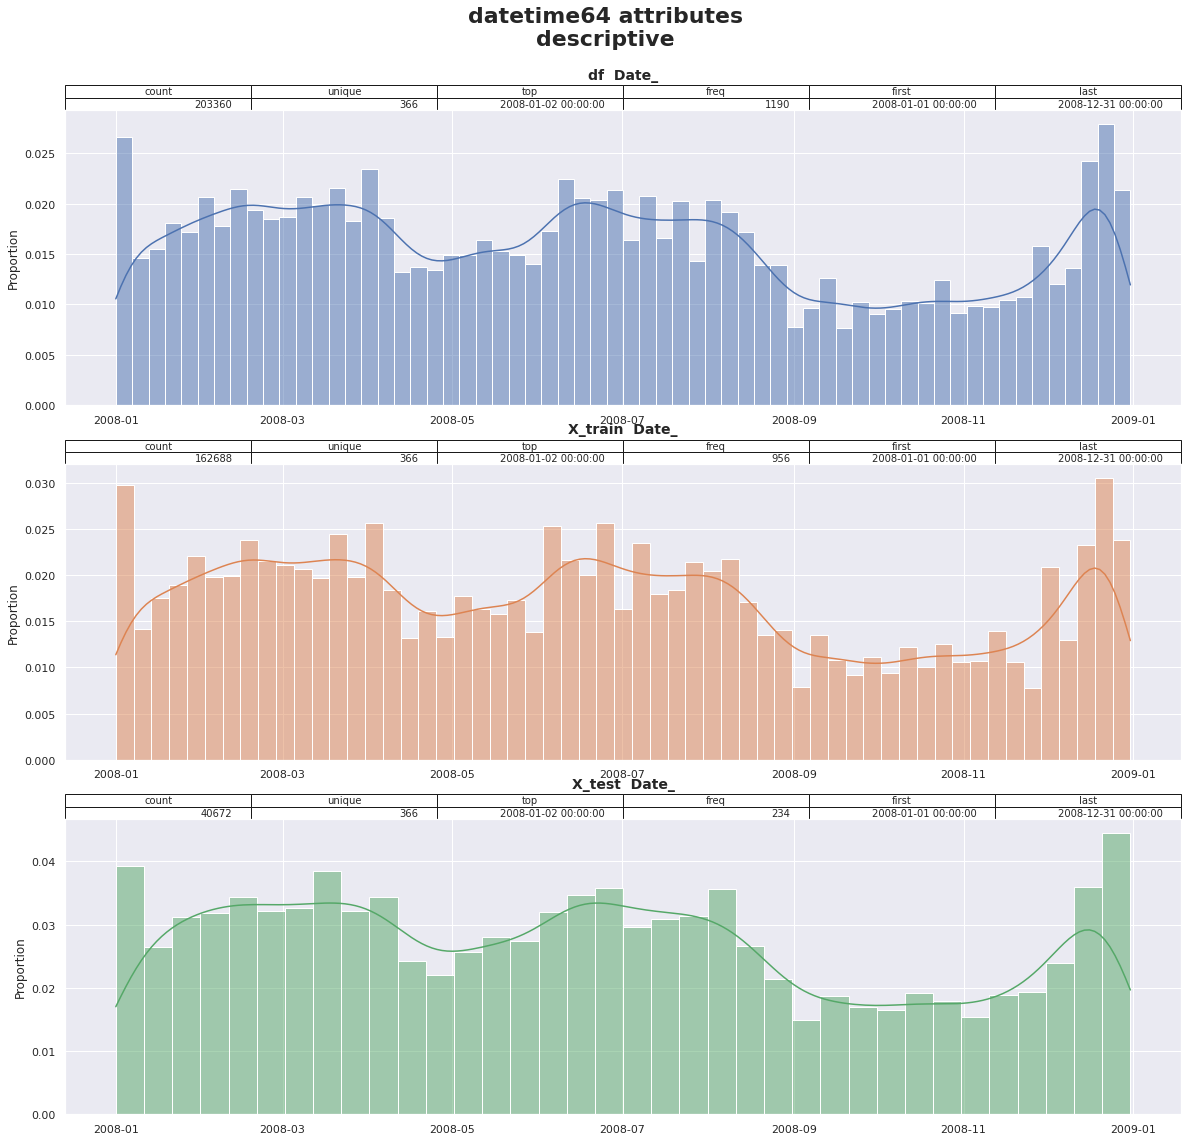

In [31]:
fig, axes = plt.subplots(nrows=len([df, X_train, X_test]), 
                         ncols=len(["Date_"]), 
                         figsize=(len(["Date_"])*20, 
                                  len([df, X_train, X_test])*6))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(["Date_"])):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[j]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[j])
        
plt.subplots_adjust(top=.9)

fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")

plt.savefig(path + "_Date_.png")
plt.show()

## _time columns

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

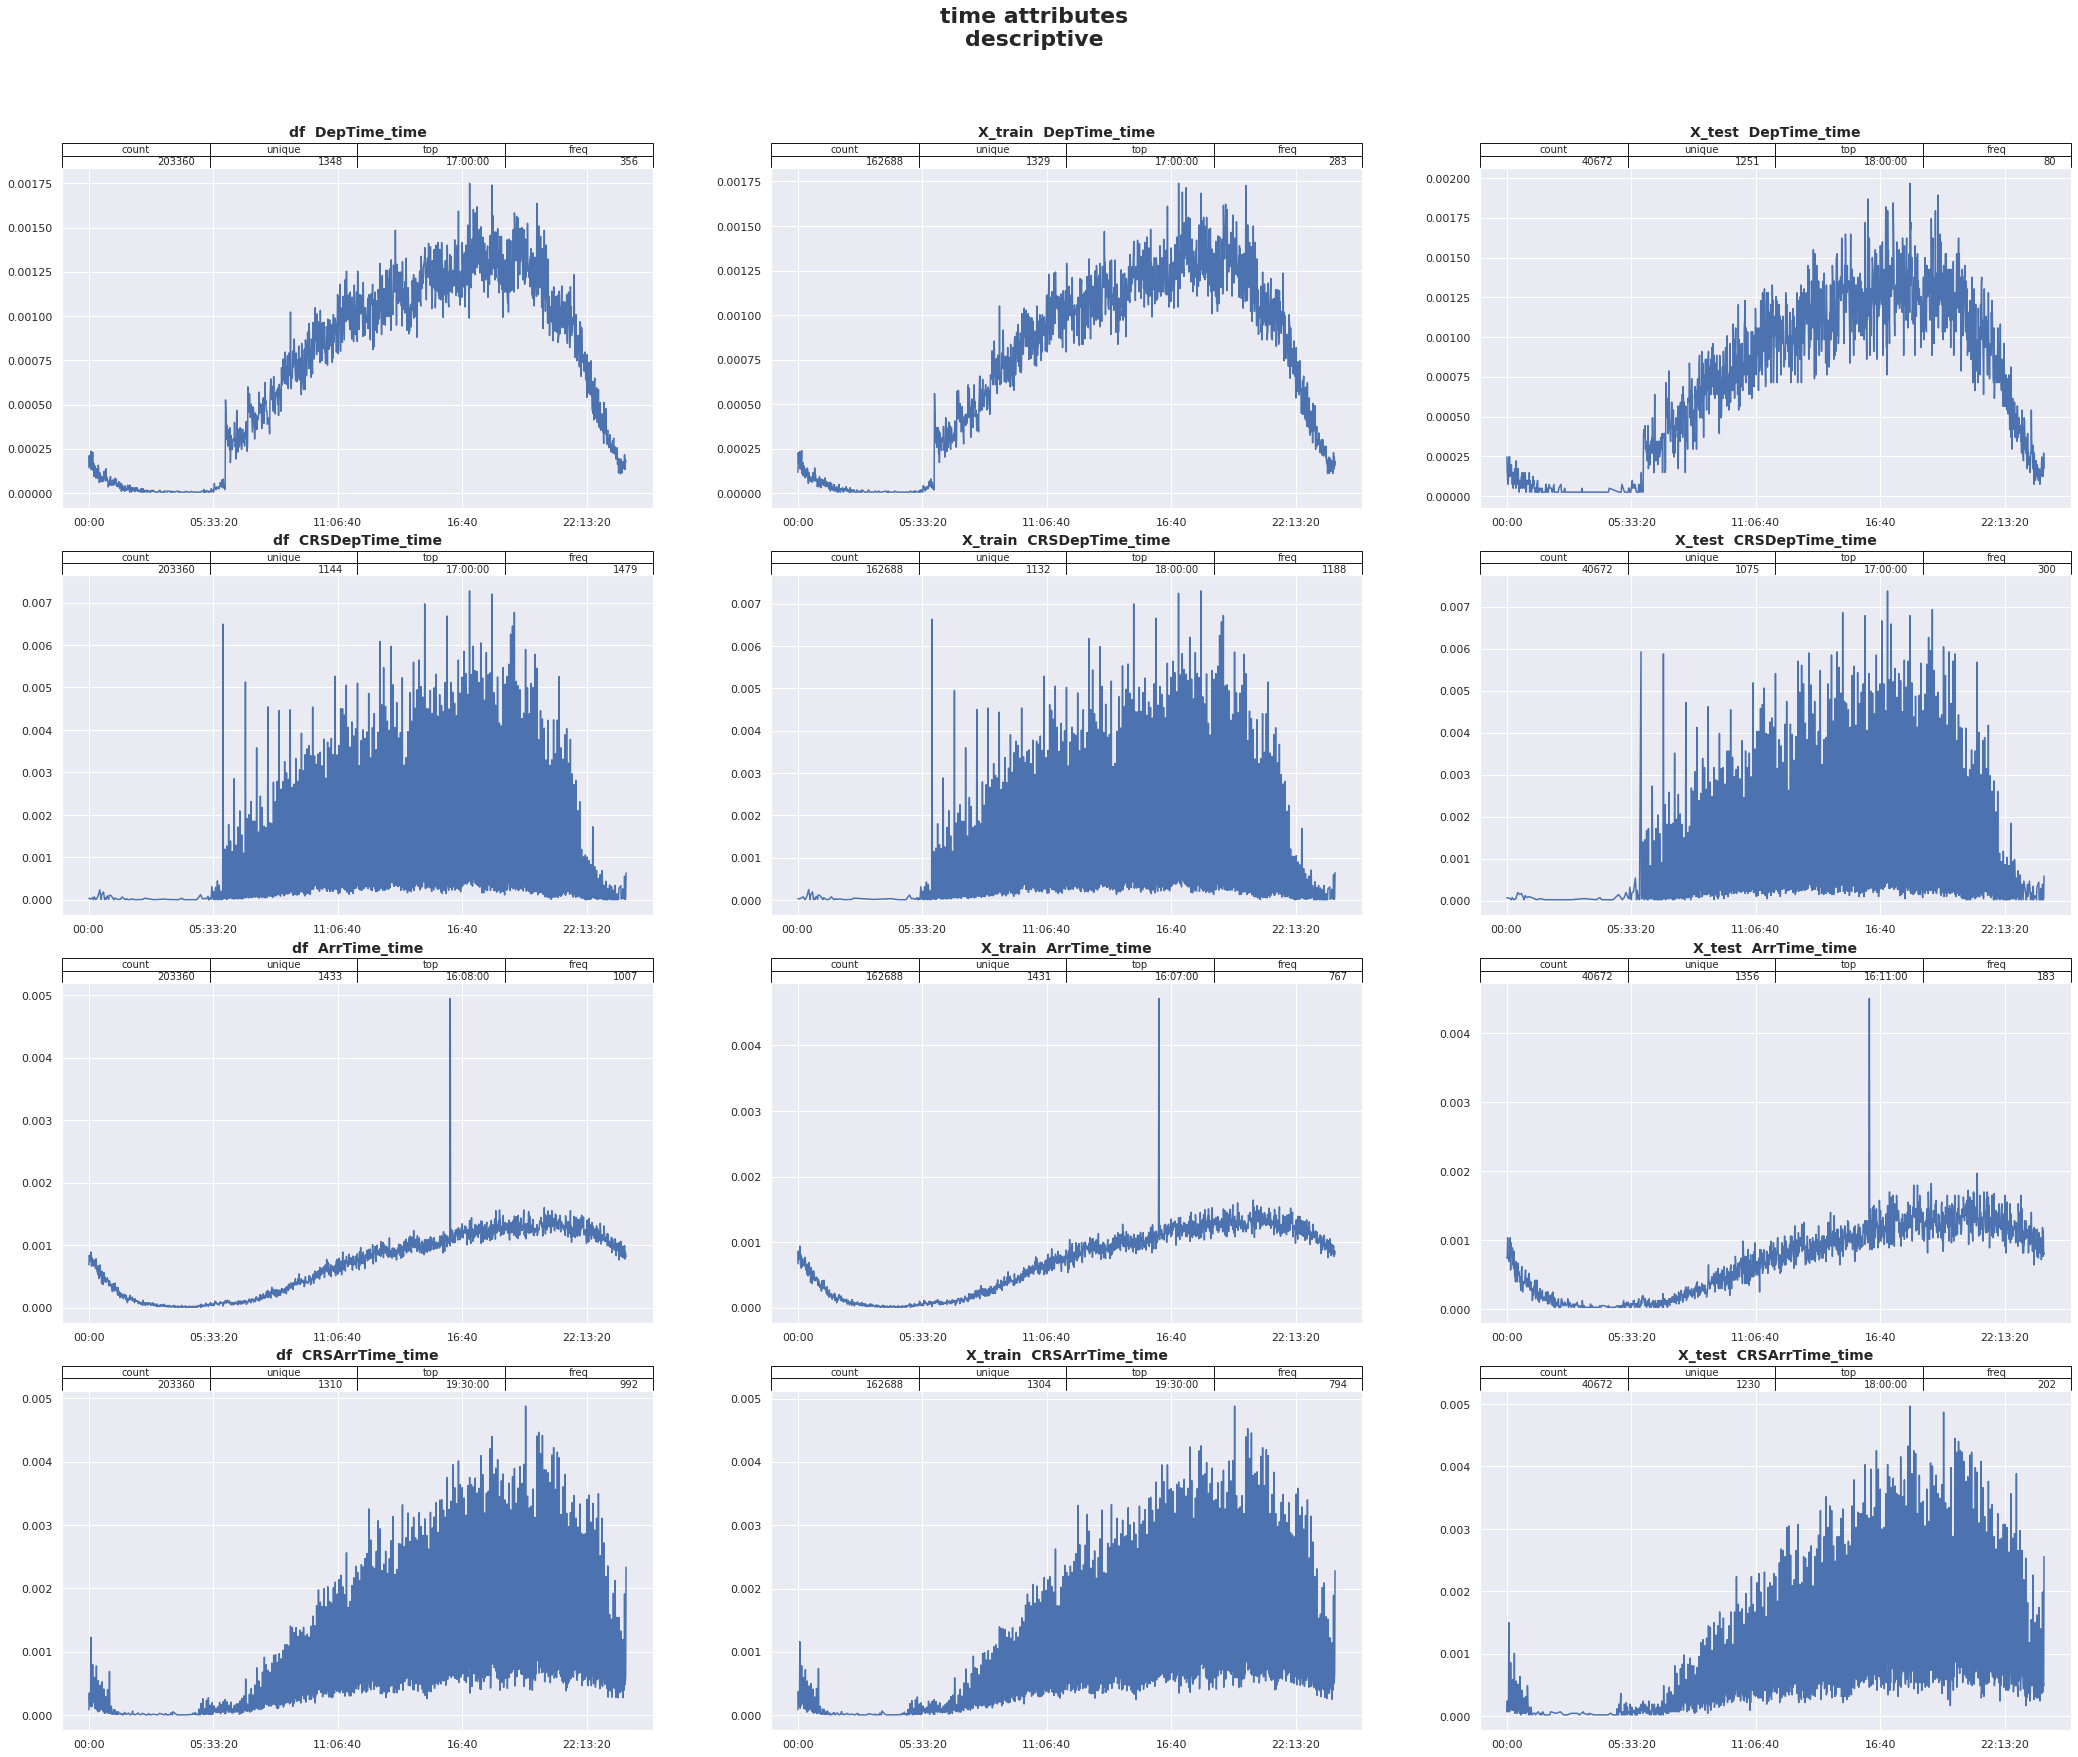

In [32]:
_time_cols = ["DepTime_time", "CRSDepTime_time", "ArrTime_time", "CRSArrTime_time"]
fig, axes = plt.subplots(nrows=len(_time_cols), 
                         ncols=len([df, X_train, X_test]), 
                         figsize=(len([df, X_train, X_test])*12, 
                                  len(_time_cols)*7))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(_time_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j])
plt.subplots_adjust(top=0.9)

fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")

plt.savefig(path +"_time.png")
plt.show()

## _datetime columns

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

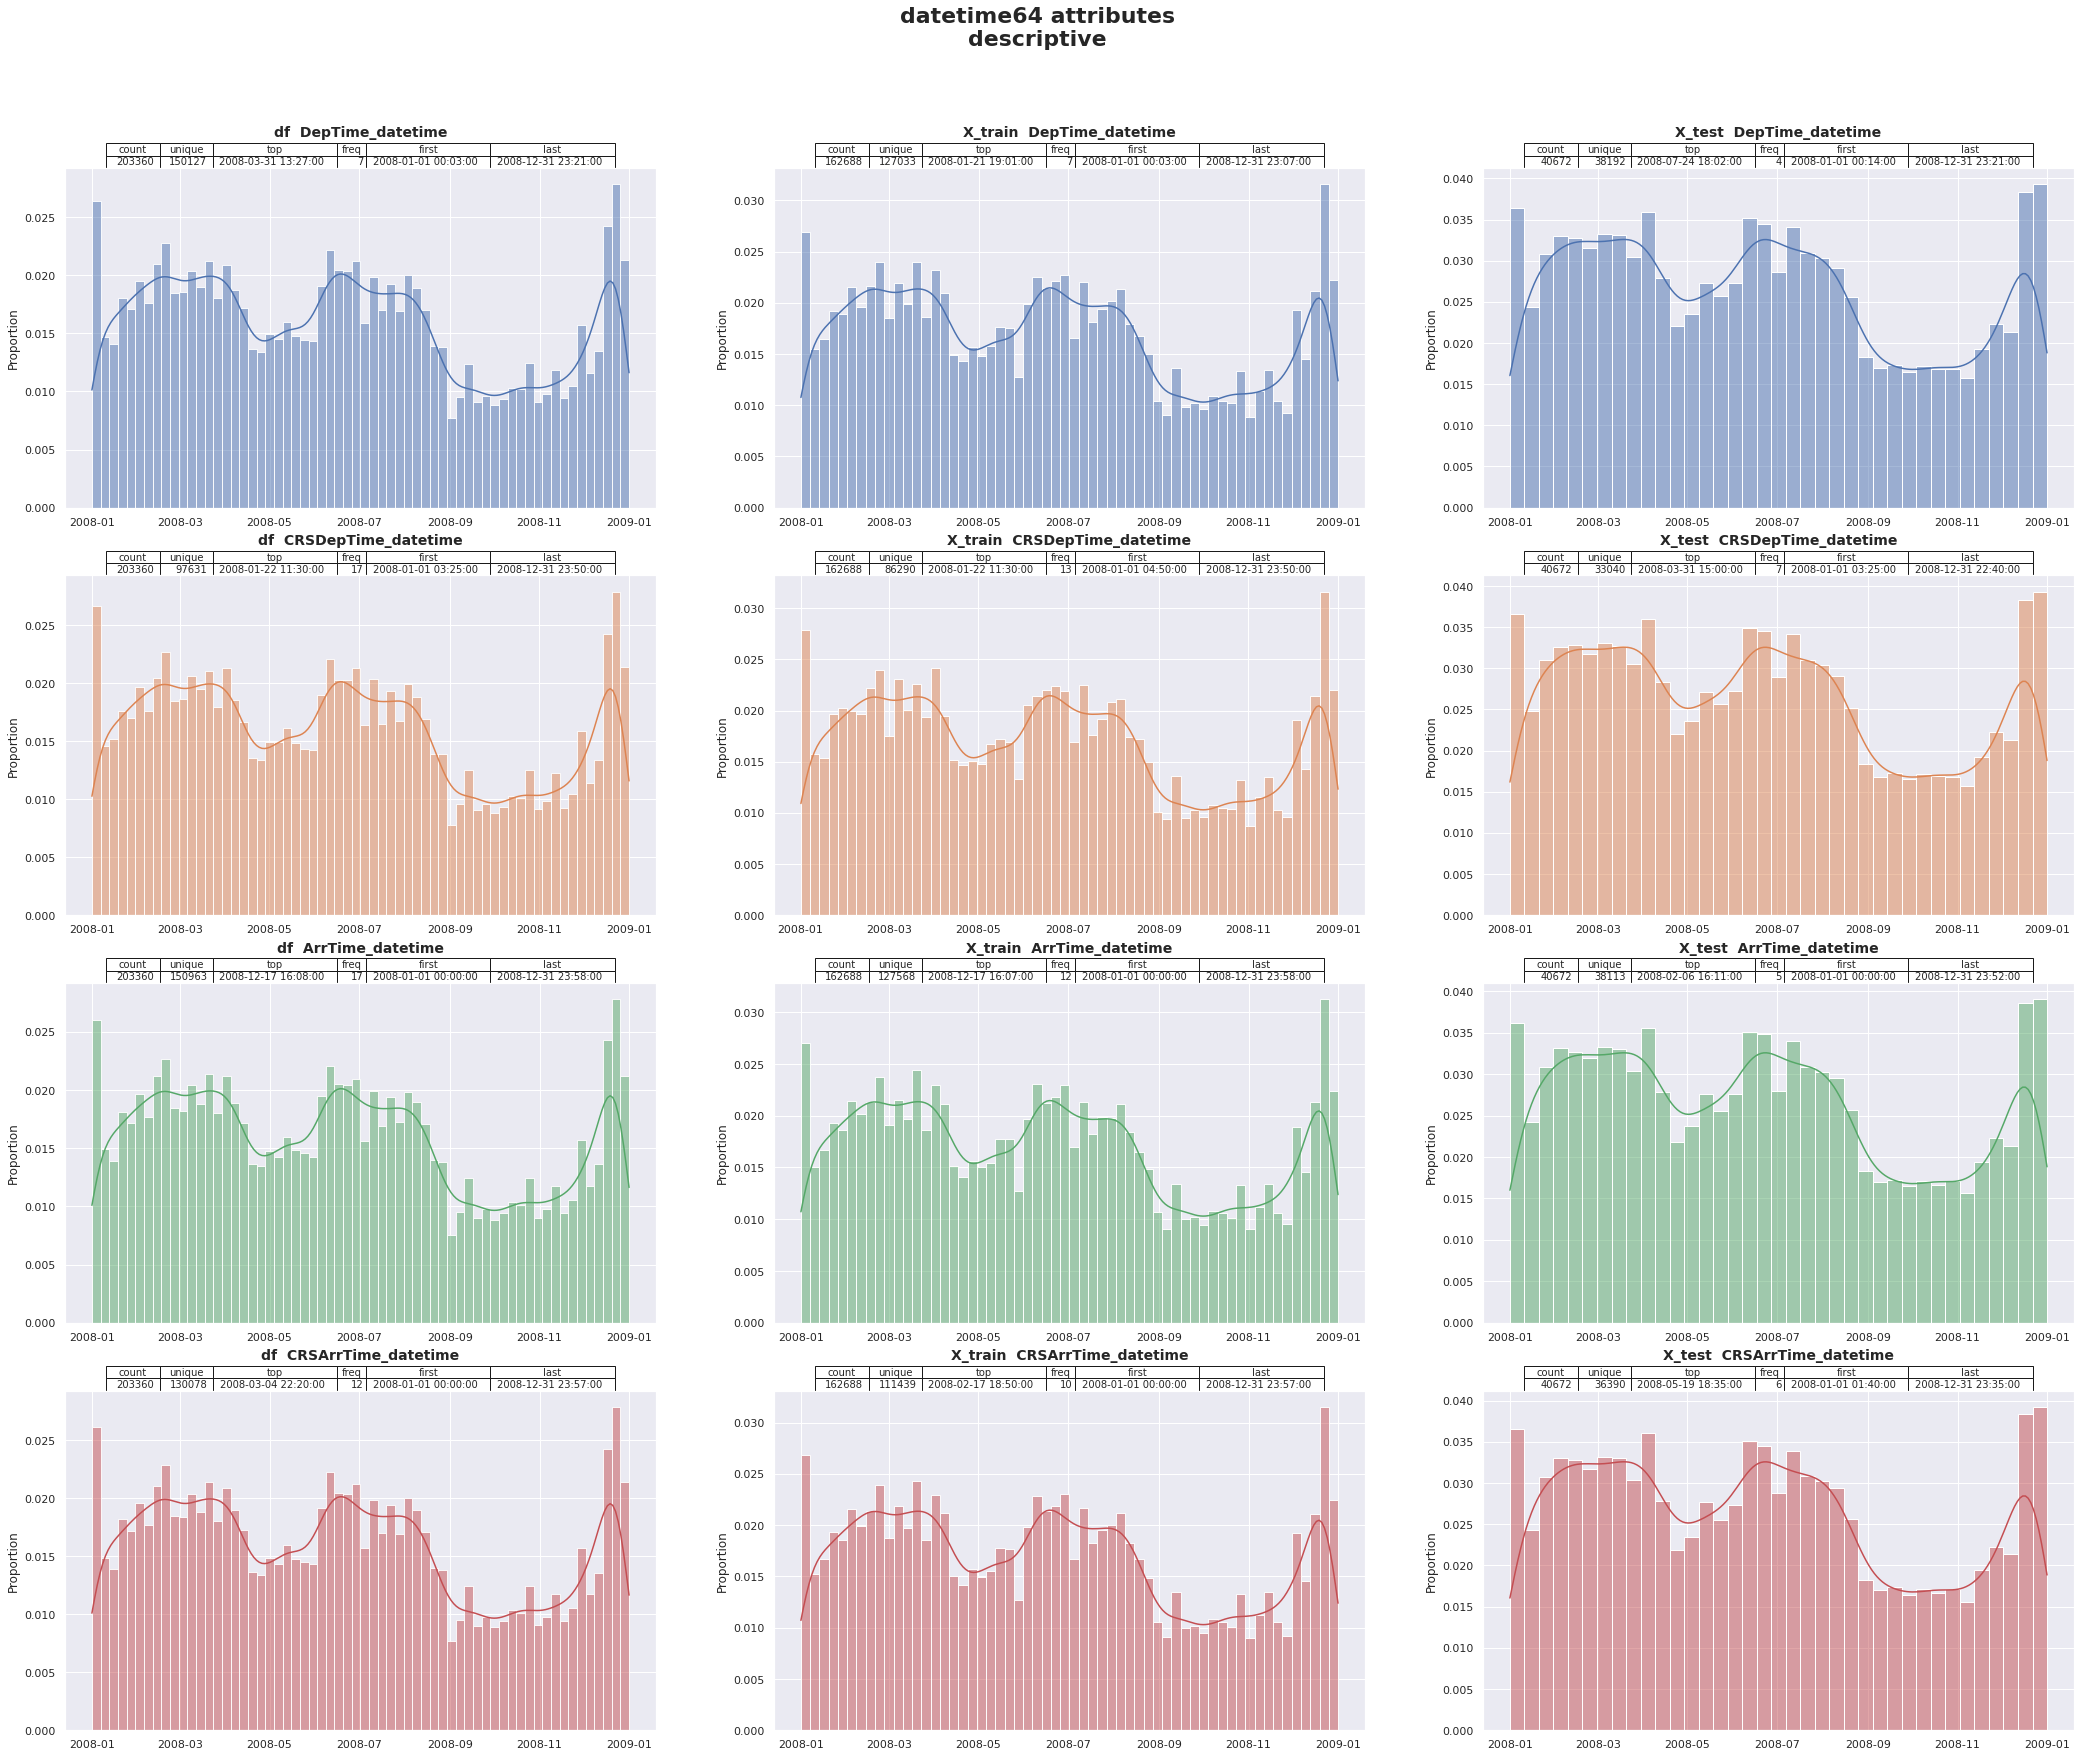

In [33]:
_datetime_cols = ["DepTime_datetime", "CRSDepTime_datetime", "ArrTime_datetime", "CRSArrTime_datetime"]

fig, axes = plt.subplots(nrows=len(_datetime_cols), 
                         ncols=len([df, X_train, X_test]), 
                         figsize=(len([df, X_train, X_test])*12, 
                                  len(_datetime_cols)*7))

for j, data in enumerate(tqdm_notebook([df, X_train, X_test])):

    ttl = "df " if data is df else "X_train " if data is X_train else "X_test "   
    
    for i, colum in enumerate(tqdm_notebook(_datetime_cols)):
        datos = data[colum]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title=ttl, 
                     ax=axes[i][j],
                     cW=[.09, .09, .21, .05, .21, .21])
plt.subplots_adjust(top=0.9)

fig.suptitle(t=infer_dtype(datos) + ' ' +'attributes\ndescriptive',
             fontsize = 22, 
             fontweight = "bold")

plt.savefig(path +"_datetime.png")
plt.show()

## Transformed minute columns


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

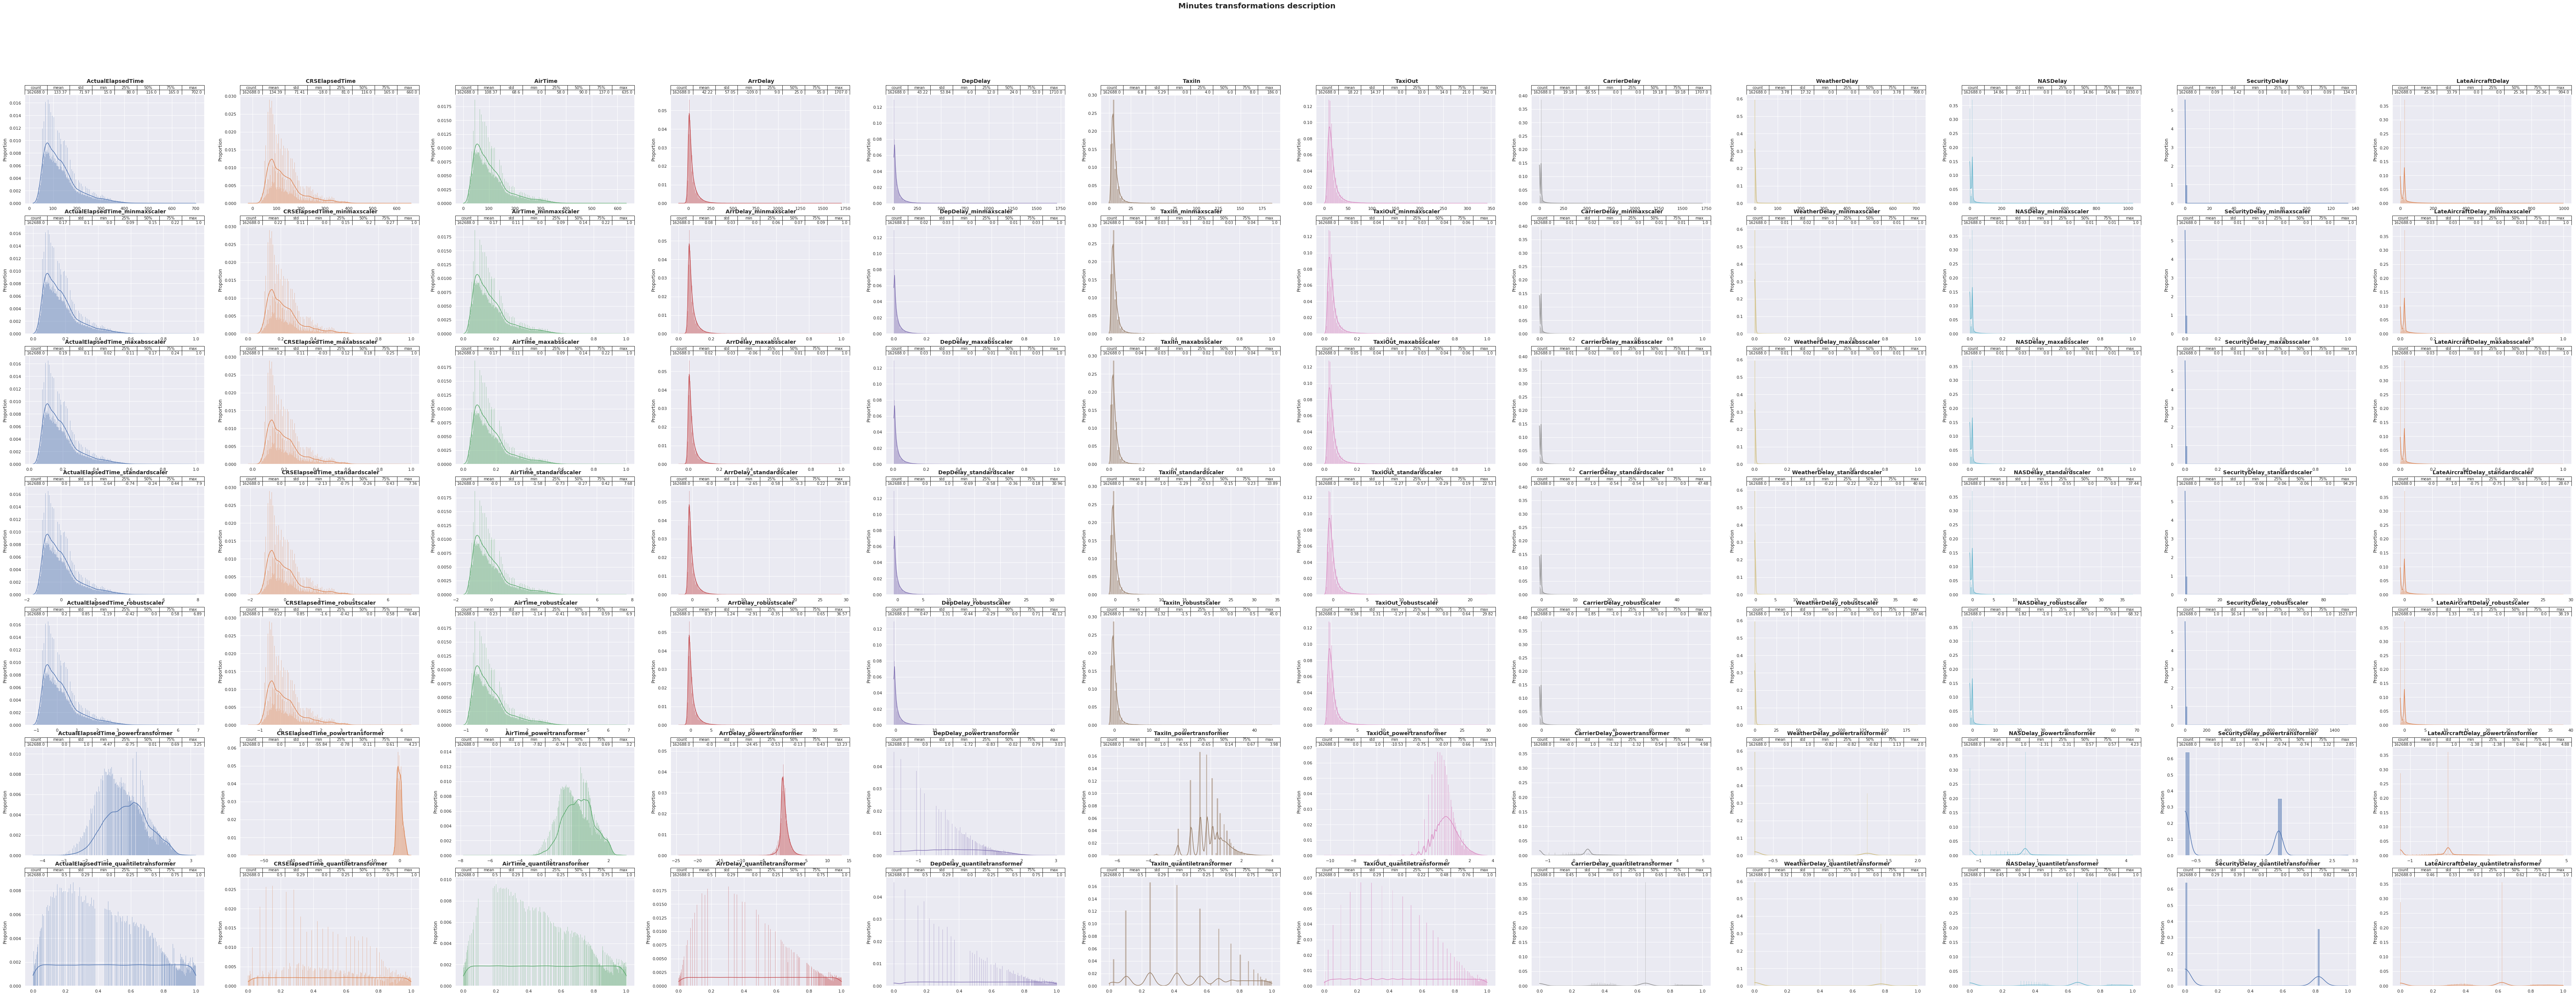

In [34]:
fig, axes = plt.subplots(nrows=len(ct.named_transformers_), 
                         ncols=len(minutes_cols), 
                         figsize=(len(minutes_cols)*10, 
                                  len(ct.named_transformers_)*6))
for c, min_col in enumerate(tqdm_notebook(minutes_cols)):
    data=X_train.filter(regex=(min_col))
    desc_table = round(data.describe(), 1).T
    transformaciones = data.columns
    for r, transf in enumerate(tqdm_notebook(transformaciones)):
        datos = data[transf]
        clr = (list(plt.rcParams['axes.prop_cycle'])*3)[c]["color"]
        
        custom_plots(dat=datos, 
                     color=clr, 
                     title="", 
                     ax=axes[r][c])
        
plt.subplots_adjust(top=0.9)
fig.suptitle(t='Minutes transformations description',
             fontsize = 20, 
             fontweight = "bold")
plt.savefig(path + "Minutes_transformations_description.png")
plt.show()

## Transformed categorical columns 

In [35]:
UniqueCarrier_transformed_df.describe()

UniqueCarrier_9E UniqueCarrier_AA  ... UniqueCarrier_XE UniqueCarrier_YV
count     40672.000000     40672.000000  ...     40672.000000     40672.000000
mean          0.027316         0.099897  ...         0.053009         0.034151
std           0.163005         0.299866  ...         0.224055         0.181620
min           0.000000         0.000000  ...         0.000000         0.000000
25%           0.000000         0.000000  ...         0.000000         0.000000
50%           0.000000         0.000000  ...         0.000000         0.000000
75%           0.000000         0.000000  ...         0.000000         0.000000
max           1.000000         1.000000  ...         1.000000         1.000000

[8 rows x 20 columns]

<AxesSubplot:>

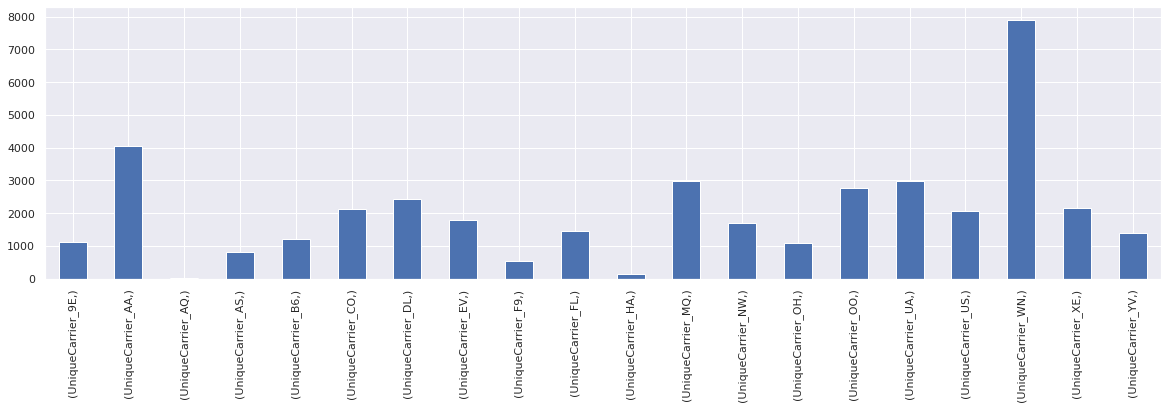

In [36]:
UniqueCarrier_transformed_df.sum().plot(kind="bar")